12/11/2021

Rebin HST UV spectra from Sulentic+2007 and combine with their SDSS optical data where available.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from os.path import exists

import sys
#sys.path.append("/Volumes/MyPassportforMac/HST/AllHSTCode/")
sys.path.append("../../AllHSTCode/")
import Read_FOS_TVM
import Read_STIS_TVM
import Read_COS_TVM

In [2]:
def isNaN(string):
    return string != string

In [3]:
!ls ../../AllData/SulenticAllData

COS                                   Sulentic2007Info.fit
FOS                                   Sulentic2007Info_wpaths.csv
FinalPlots                            Sulentic2007Info_wpaths.csv .csv
Final_rebinned_tvm                    Sulentic2007Tables1_2.classicalRM.fit
OtherOpt                              Sulentic2007Tables1_2.fit
SDSS                                  notes_sulentic_tvm.txt
STIS                                  speclist_sdss_sulentic07.txt
Sulentic2007Info.csv                  sulentic_targets.ipynb


In [4]:
sul = pd.read_csv("../../AllData/SulenticAllData/Sulentic2007Info_wpaths.csv")
sul

,IAU,Instrument,FOS_Name,STIS_Name,COS_Name,HST_Opt,Inst_final,S2N_coadd,z,Hbeta,...,_RA,_DE,SDSS Spectra,SDSS_NAME,RA,DEC,PLATE,MJD,FIBERID,Separation
0,J12291+0203,FOS+STIS,3C273,None,None,STIS/3C273,FOS,219,0.1583,3829,...,187.277896,2.052406,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,J18421+7946,FOS+STIS,3C390,None,None,STIS/3C390,FOS,26,0.0555,12688,...,280.537458,79.771424,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,J14275+2632,FOS+STIS,J14275+2632,B21425+26,None,NaN,FOS,17,0.3634,9224,...,216.898334,26.537402,yes,142735.60+263214.5,216.898360,26.537377,2135.0,53827.0,340.0,0.121078
3,J01376-2430,STIS,None,J01376-2430,None,NaN,STIS,19,0.8350,10563,...,24.409853,-24.514971,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,J04232-0120,FOS+STIS,J04232-0120,J04232-0120,None,NaN,FOS,17,0.9150,3185,...,65.815836,-1.342518,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,J01399+0131,FOS,UM355,None,None,NaN,FOS,5.8*,0.2600,11245,...,24.988842,1.529492,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,J13532+6345,STIS,None,PG1351+640,None,NaN,STIS,19,0.0882,5876,...,208.315980,63.762694,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,J17046+6044,FOS+STIS,SBS1704+608,SBS1704+608,None,NaN,FOS,22,0.3720,9224,...,256.172372,60.741814,yes,170441.38+604430.5,256.172426,60.741806,353.0,51703.0,377.0,0.099728
128,J00573-2222,STIS,None,TONS180,None,NaN,STIS,26,0.0620,1131,...,14.334174,-22.382344,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
z       = sul["z"].values
sdss    = ~isNaN(sul["SDSS_NAME"].values)
plate   = sul["PLATE"].values
mjd     = sul["MJD"].values
fiber   = sul["FIBERID"].values
id_fos  = sul["FOS_Name"].values
id_stis = sul["STIS_Name"].values
id_cos = sul["COS_Name"].values

In [6]:
FOS  = sul["FOS_Name"].values!="None"
STIS = sul["STIS_Name"].values!="None"
COS  = sul["COS_Name"].values!="None"
(FOS&sdss).sum(), (STIS&sdss).sum(), (COS&sdss).sum(), ((FOS|STIS|COS)&sdss).sum()

(52, 3, 0, 53)

In [7]:
id_cos[(COS&sdss)]

array([], dtype=object)

There is one Sulentic source that only has COS data.  Will worry about that as I collect more DR16 sources for the full sample.

For now the sample I'll work with is those with either FOS or STIS data, and which have SDSS-DR16 data as well.  This gives 53 Sulentic quasars.

In [8]:
#Check if we have NecessaryParams.csv file saved for each 
N = 0
for i in range(sul[FOS].shape[0]):
    if not exists("/Volumes/MyPassportforMac/HST/AllData/SulenticAllData/FOS/%s/NecessaryParams.csv" % id_fos[FOS][i]):
        N += 1
        print("Missing HST Observational Params for %s" % id_fos[FOS][i])
    #Read_FOS_TVM.rebin(id_fos[FOS][i], "%04d/spec-%04d-%05d-%04d.fits"%(plate[FOS][i],mjd[FOS][i],fiber[FOS][i]), z[FOS][i])
    
    
N

Missing HST Observational Params for 3C273
Missing HST Observational Params for 3C390
Missing HST Observational Params for J14275+2632
Missing HST Observational Params for J04232-0120
Missing HST Observational Params for J21148+0607
Missing HST Observational Params for J21377-1432
Missing HST Observational Params for J22541+1136
Missing HST Observational Params for 3C057
Missing HST Observational Params for 3C095
Missing HST Observational Params for 3C110
Missing HST Observational Params for 3C207
Missing HST Observational Params for 3C215
Missing HST Observational Params for 3C232
Missing HST Observational Params for 3C254
Missing HST Observational Params for 3C263
Missing HST Observational Params for 3C281
Missing HST Observational Params for 3C334
Missing HST Observational Params for 3C336
Missing HST Observational Params for 3C345
Missing HST Observational Params for 3C454
Missing HST Observational Params for Ark120
Missing HST Observational Params for Fairall9
Missing HST Observat

117

Good, should be ready to test all FOS-Sulentic spectra.  Now same thing for STIS and COS.

In [9]:
#Check if we have NecessaryParams.csv file saved for each 
N = 0
for i in range(sul[STIS].shape[0]):
    if not exists("/Volumes/MyPassportforMac/HST/AllData/SulenticAllData/STIS/%s/NecessaryParams.csv" % id_stis[STIS][i]):
        N += 1
        print("Missing HST Observational Params for %s" % id_stis[STIS][i])
    #Read_STIS_TVM.rebin(id_stis[STIS][i], "%04d/spec-%04d-%05d-%04d.fits"%(plate[STIS][i],mjd[STIS][i],fiber[STIS][i]), z[STIS][i])
    
    
N

Missing HST Observational Params for B21425+26
Missing HST Observational Params for J01376-2430
Missing HST Observational Params for J04232-0120
Missing HST Observational Params for J07086-4933
Missing HST Observational Params for J13122+3515
Missing HST Observational Params for J13253-3824
Missing HST Observational Params for J15591+3501
Missing HST Observational Params for J21148+0607
Missing HST Observational Params for J21377-1432
Missing HST Observational Params for J22541+1136
Missing HST Observational Params for Mrk509
Missing HST Observational Params for NGC3227
Missing HST Observational Params for NGC3516
Missing HST Observational Params for NGC4253
Missing HST Observational Params for NGC4395
Missing HST Observational Params for PG1351+640
Missing HST Observational Params for SBS1704+608
Missing HST Observational Params for TONS180
Missing HST Observational Params for UGC12163


19

Finally.  Now the COS sources.  Should be able to use the ``all_exposures.txt`` files, but I'm not sure where they came from, so it would be tricky to fill in for those that don't have.

In [10]:
#Check if we have NecessaryParams.csv file saved for each 
N = 0
for i in range(sul[COS].shape[0]):
    if not exists("/Volumes/MyPassportforMac/HST/AllData/SulenticAllData/COS/%s/all_exposures.txt" % id_cos[COS][i]):
        N += 1
        print("Missing HST Observational Params for %s" % id_cos[COS][i])
    #Read_COS_TVM.rebin(id_cos[COS][i], "%04d/spec-%04d-%05d-%04d.fits"%(plate[COS][i],mjd[COS][i],fiber[COS][i]), z[COS][i])
    
    
N

Missing HST Observational Params for J00535+1241
Missing HST Observational Params for J16279+5522
Missing HST Observational Params for MR2251-178


3

In [11]:
sdss

array([False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False,  True,  True,
        True,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False, False,  True,  True, False,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,

Median wavelength resolution: 69.09 km/s
SNR is 8.850807


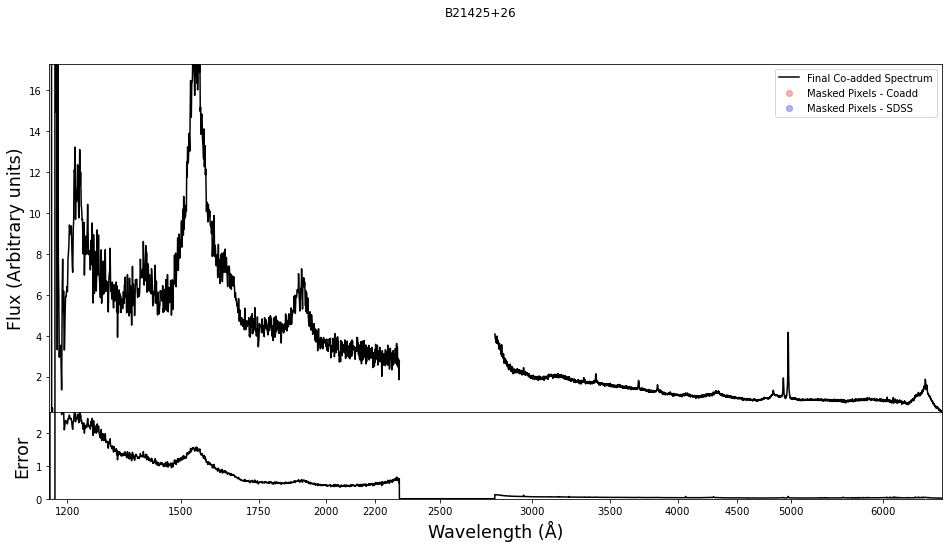

Good: B21425+26
------------


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_STIS_TVM.py:364: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i])
../../AllHSTCode/Read_STIS_TVM.py:413: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 18.509234


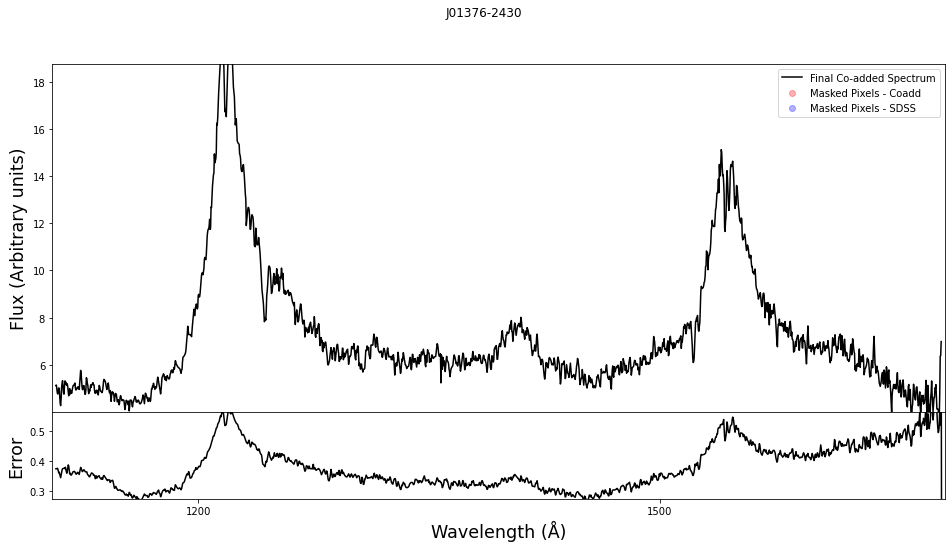

Good: J01376-2430
------------


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Median wavelength resolution: 69.09 km/s
Coadd for J04232-0120 is not viable.
SNR is 6.864317


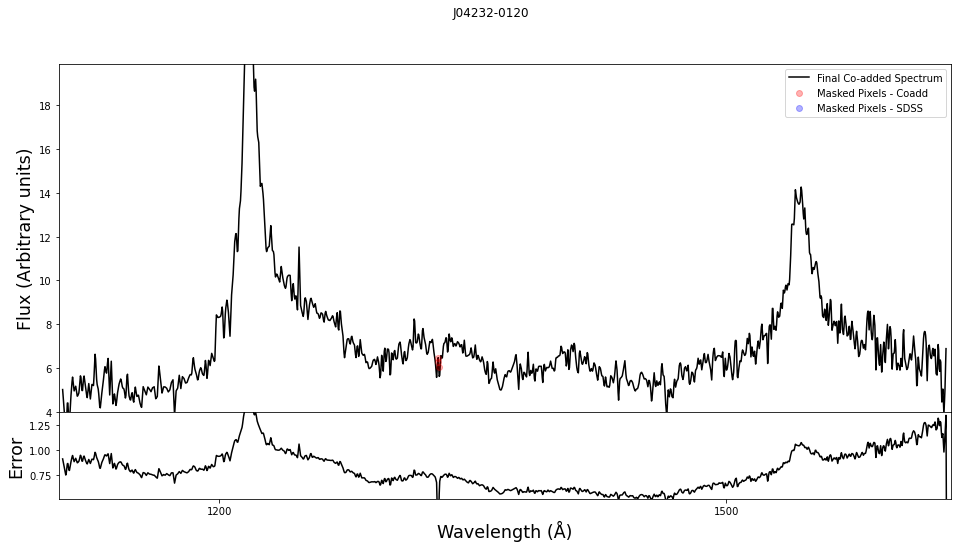

Good: J04232-0120
------------


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_STIS_TVM.py:364: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i])
../../AllHSTCode/Read_STIS_TVM.py:413: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])
../../AllHSTCode/Read_STIS_TVM.py:442: RuntimeWarning: divide by zero encountered in true_divide
  new_weights = 1 / (new_errs**2.)


Median wavelength resolution: 69.09 km/s
SNR is 35.284889


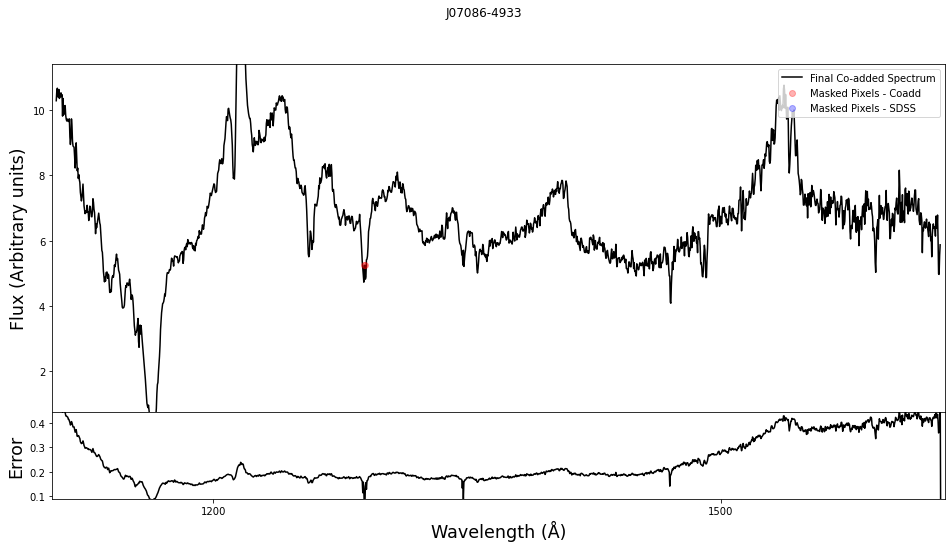

Good: J07086-4933
------------


../../AllHSTCode/Read_STIS_TVM.py:442: RuntimeWarning: divide by zero encountered in true_divide
  new_weights = 1 / (new_errs**2.)
../../AllHSTCode/Read_STIS_TVM.py:506: RuntimeWarning: divide by zero encountered in true_divide
  sdss_fluxerr = (1/(np.sqrt(hdulist[1].data["ivar"])))*10**-17 #rest-frame flux uncertainty


Median wavelength resolution: 69.09 km/s
SNR is 12.320553


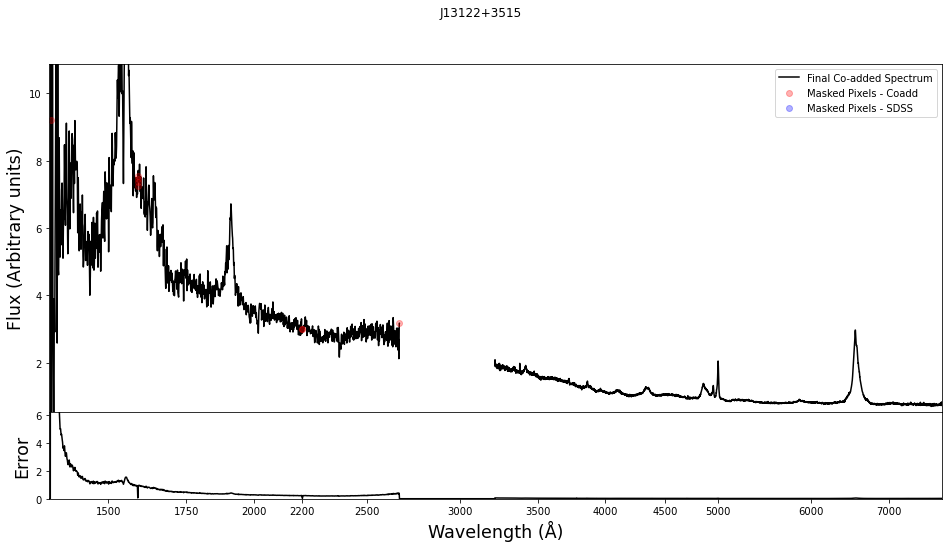

Good: J13122+3515
------------


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_STIS_TVM.py:364: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i])
../../AllHSTCode/Read_STIS_TVM.py:413: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])
../../AllHSTCode/Read_STIS_TVM.py:442: RuntimeWarning: divide by zero encountered in true_divide
  new_weights = 1 / (new_errs**2.)


Median wavelength resolution: 69.09 km/s
SNR is 28.029384


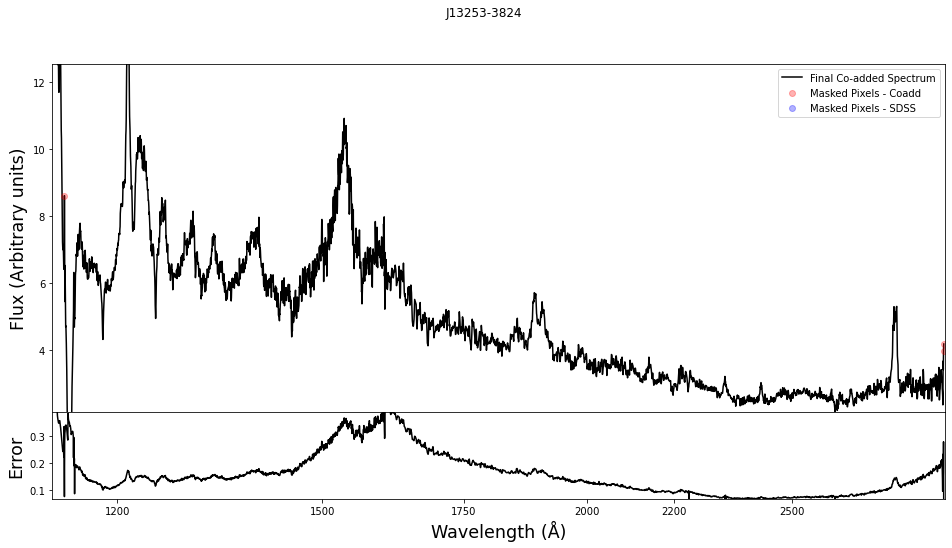

Good: J13253-3824
------------


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_STIS_TVM.py:364: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i])
../../AllHSTCode/Read_STIS_TVM.py:413: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 31.919241


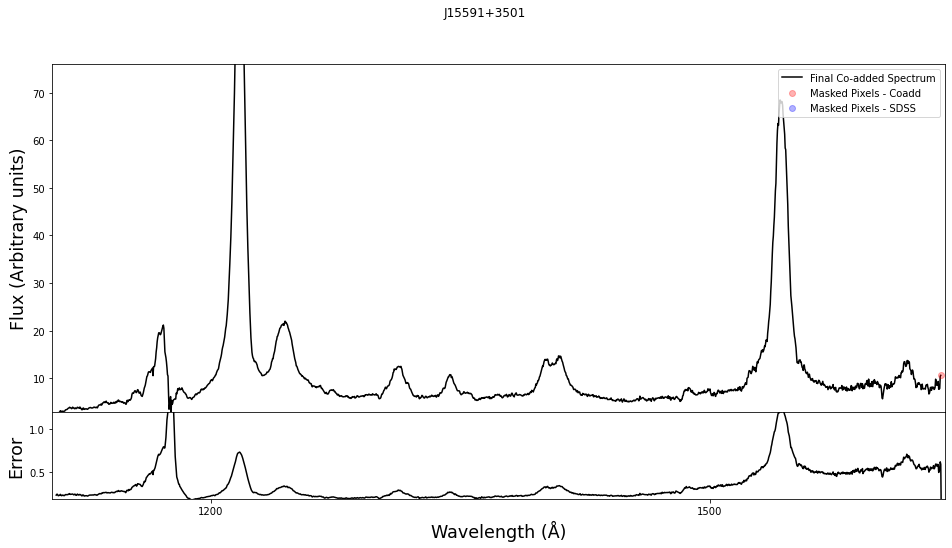

Good: J15591+3501
------------


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_STIS_TVM.py:364: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i])
../../AllHSTCode/Read_STIS_TVM.py:413: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 19.649276


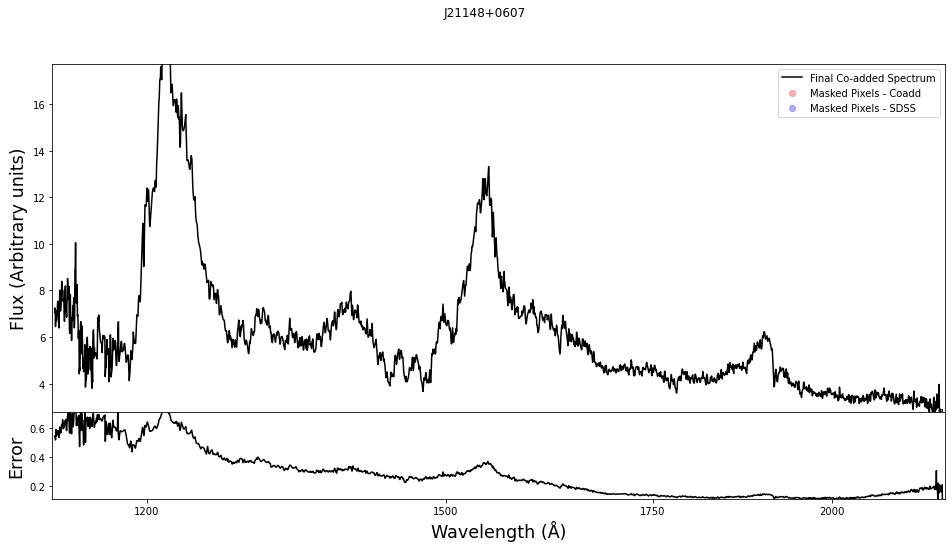

Good: J21148+0607
------------


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Median wavelength resolution: 69.09 km/s
SNR is 7.789281


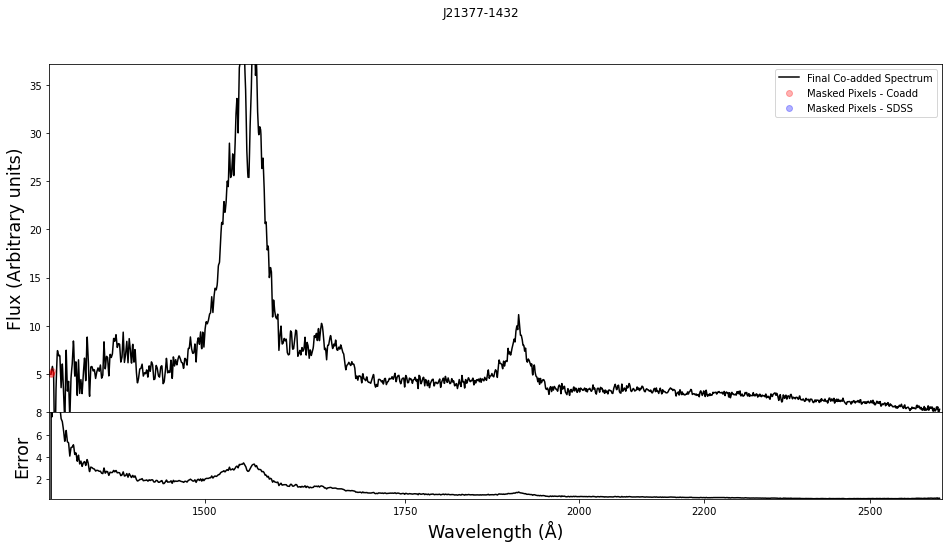

Good: J21377-1432
------------
Median wavelength resolution: 69.09 km/s
SNR is 8.838248


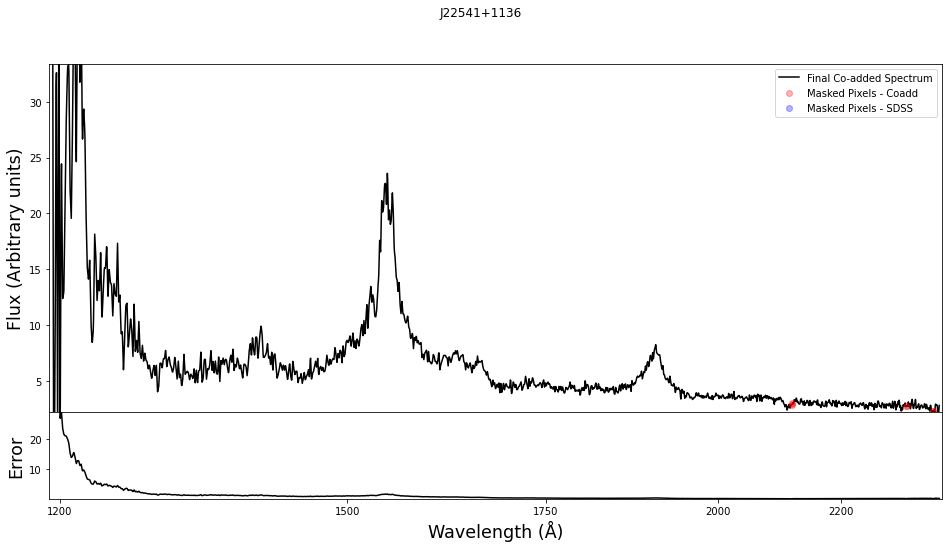

Good: J22541+1136
------------


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_STIS_TVM.py:364: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i])
../../AllHSTCode/Read_STIS_TVM.py:413: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])
../../AllHSTCode/Read_STIS_TVM.py:442: RuntimeWarning: divide by zero encountered in true_divide
  new_weights = 1 / (new_errs**2.)


Median wavelength resolution: 69.09 km/s
SNR is 98.127853


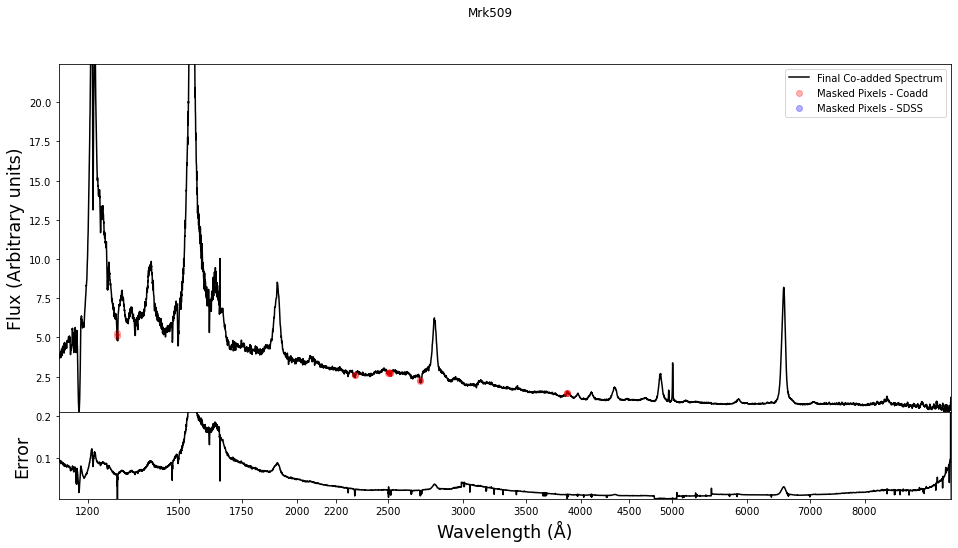

Good: Mrk509
------------


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_STIS_TVM.py:364: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i])
../../AllHSTCode/Read_STIS_TVM.py:413: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])
../../AllHSTCode/Read_STIS_TVM.py:442: RuntimeWarning: divide by zero encountered in true_divide
  new_weights = 1 / (new_errs**2.)


Median wavelength resolution: 69.09 km/s
SNR is 61.851648


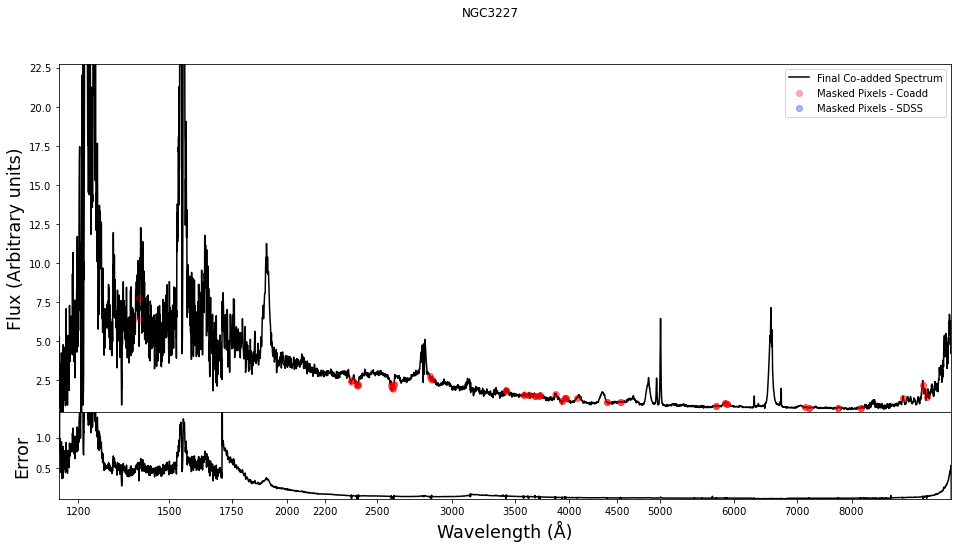

Good: NGC3227
------------


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_STIS_TVM.py:364: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i])
../../AllHSTCode/Read_STIS_TVM.py:413: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])
../../AllHSTCode/Read_STIS_TVM.py:442: RuntimeWarning: divide by zero encountered in true_divide
  new_weights = 1 / (new_errs**2.)


Median wavelength resolution: 69.09 km/s
SNR is 818.705969


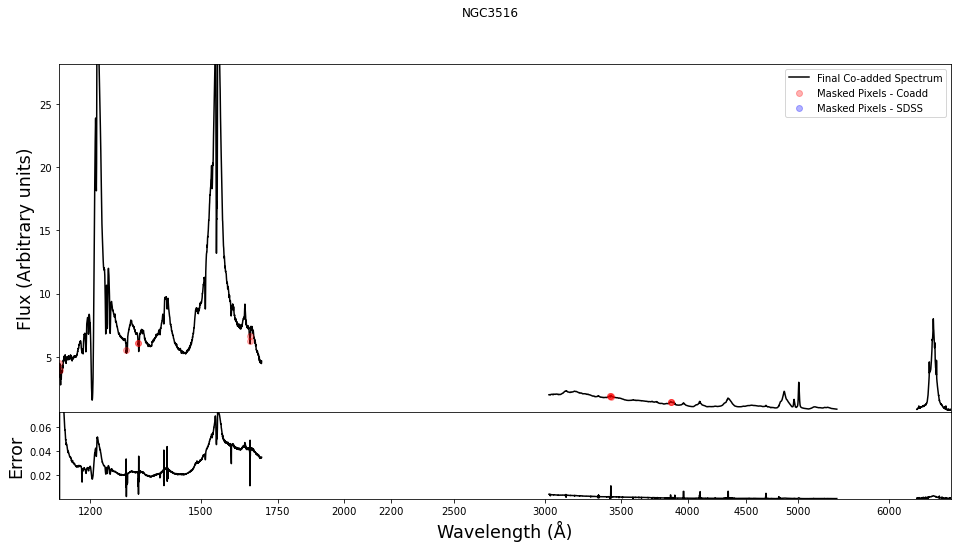

Good: NGC3516
------------


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Median wavelength resolution: 69.09 km/s
Coadd for NGC4253 is not viable.
SNR is 3.216637


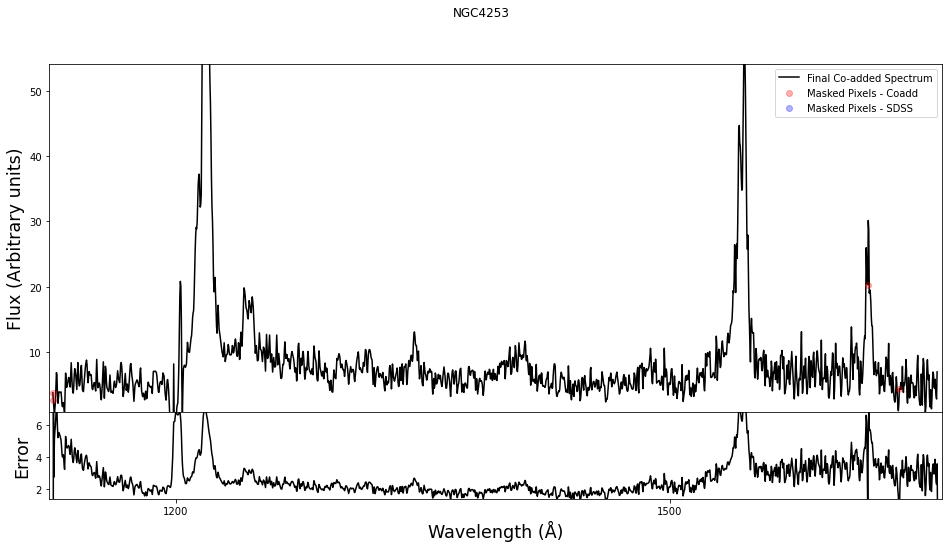

Good: NGC4253
------------


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_STIS_TVM.py:364: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i])
../../AllHSTCode/Read_STIS_TVM.py:413: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 45.982492


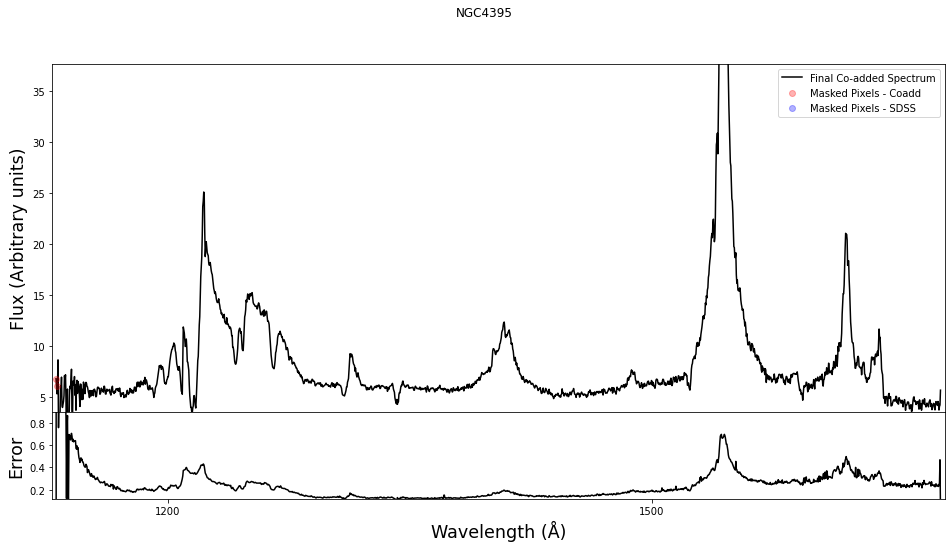

Good: NGC4395
------------


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_STIS_TVM.py:442: RuntimeWarning: divide by zero encountered in true_divide
  new_weights = 1 / (new_errs**2.)


Median wavelength resolution: 69.09 km/s
SNR is 18.848682


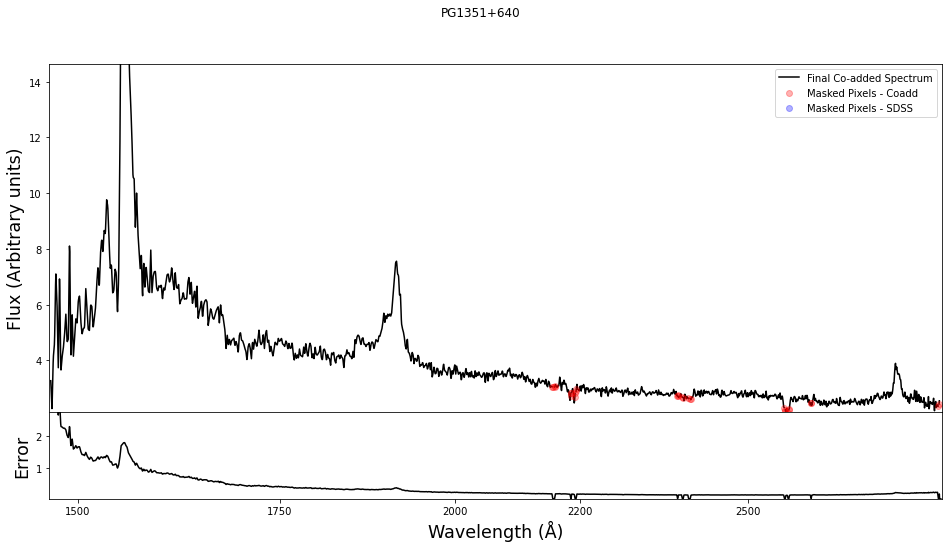

Good: PG1351+640
------------
Median wavelength resolution: 69.09 km/s
SNR is 10.675190


../../AllHSTCode/Read_STIS_TVM.py:506: RuntimeWarning: divide by zero encountered in true_divide
  sdss_fluxerr = (1/(np.sqrt(hdulist[1].data["ivar"])))*10**-17 #rest-frame flux uncertainty


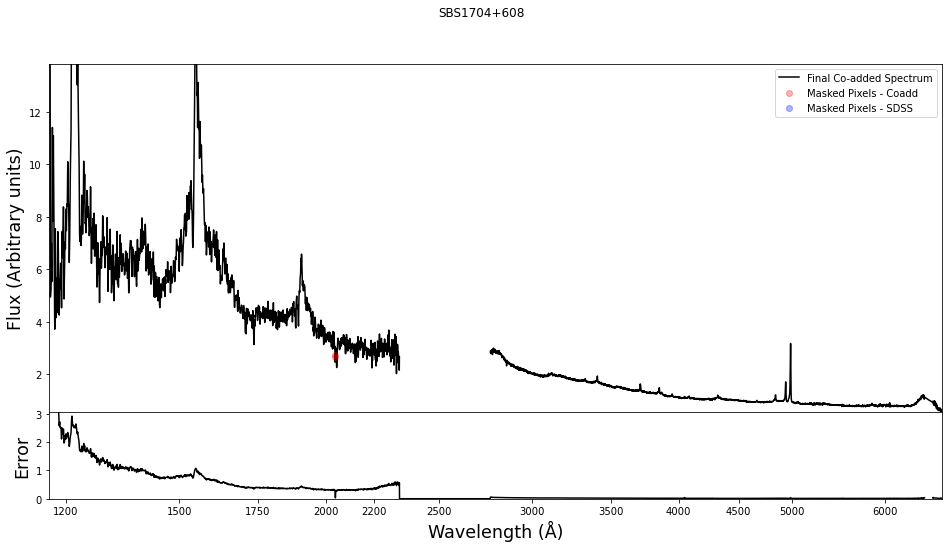

Good: SBS1704+608
------------


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_STIS_TVM.py:364: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i])
../../AllHSTCode/Read_STIS_TVM.py:413: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])
../../AllHSTCode/Read_STIS_TVM.py:442: RuntimeWarning: divide by zero encountered in true_divide
  new_weights = 1 / (new_errs**2.)


Median wavelength resolution: 69.09 km/s
SNR is 26.328609


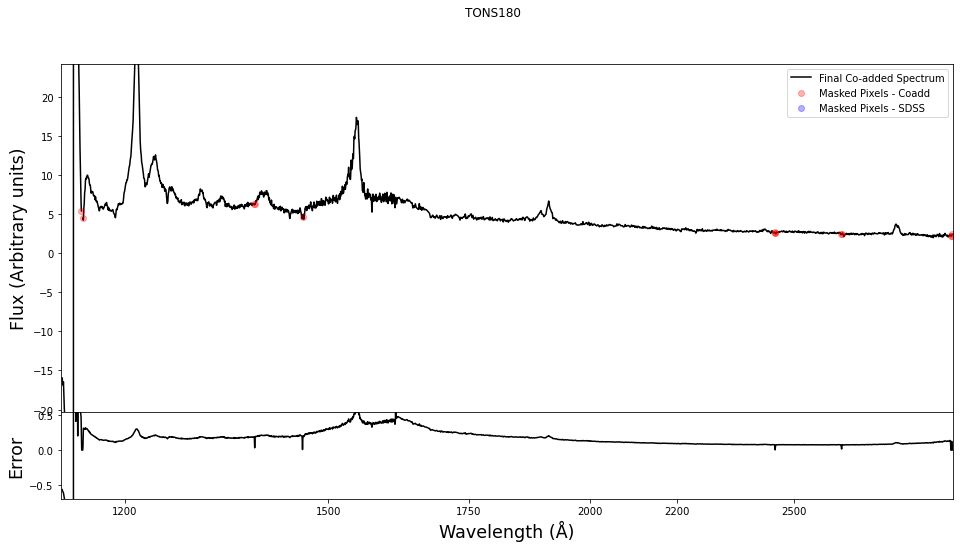

Good: TONS180
------------


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_STIS_TVM.py:364: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i])
../../AllHSTCode/Read_STIS_TVM.py:413: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 85.322719


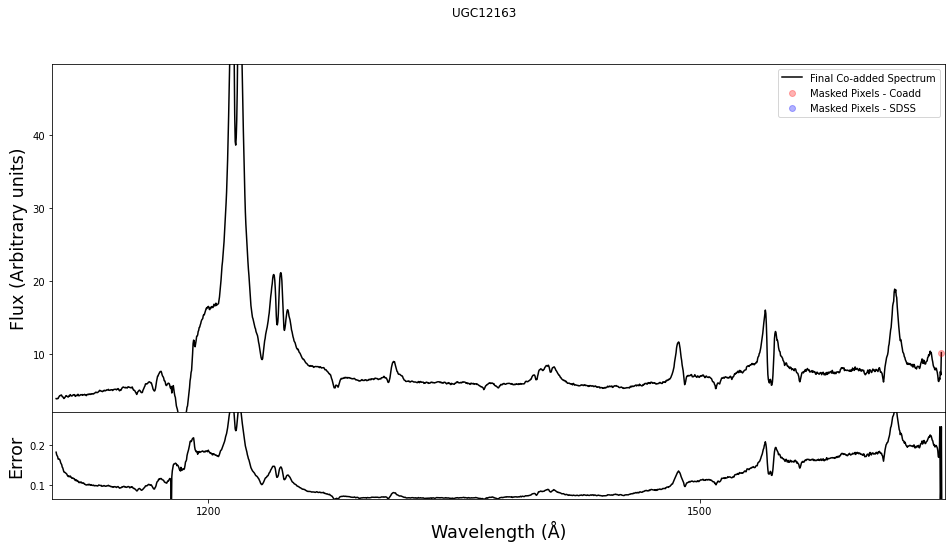

Good: UGC12163
------------


In [12]:
#%%capture
for i in range(sul[STIS].shape[0]):
    if sdss[STIS][i]: fn_sdss = "%04d/spec-%04d-%05d-%04d.fits"%(plate[STIS][i],plate[STIS][i],mjd[STIS][i],fiber[STIS][i])
    else: fn_sdss = None
    #try:
    Read_STIS_TVM.rebin(id_stis[STIS][i], fn_sdss, z[STIS][i])
    print("Good: %s\n------------" % id_stis[STIS][i])
    """
    except IndexError:
        print("Index Error: %s" % id_stis[STIS][i])
        #except ValueError:
        #    print("%s doesn't work"%id_stis[STIS][i])
    except ValueError:
        print("Value Error: %s" % id_stis[STIS][i])
    """
_=0

In [13]:
np.isnan((sul.iloc[id_fos=="J06357-7516"])["SDSS_NAME"].values[0])

True

In [14]:
ID = sul.iloc[id_fos=="J06357-7516"]
ID

,IAU,Instrument,FOS_Name,STIS_Name,COS_Name,HST_Opt,Inst_final,S2N_coadd,z,Hbeta,...,_RA,_DE,SDSS Spectra,SDSS_NAME,RA,DEC,PLATE,MJD,FIBERID,Separation
44,J06357-7516,FOS,J06357-7516,None,None,NaN,FOS,20,0.651,7922,...,98.94381,-75.271317,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 19.954728


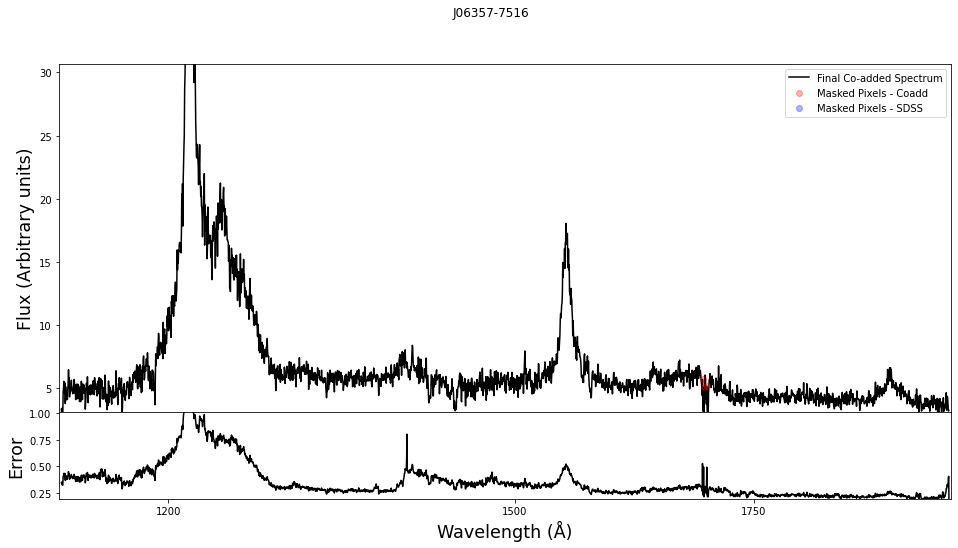

Good: J06357-7516


In [15]:
ID = sul.iloc[id_fos=="J06357-7516"]
fn_sdss = None if np.isnan(ID["SDSS_NAME"].values[0]) else ID["SDSS_NAME"].values[0]

try:
    Read_FOS_TVM.rebin(ID["FOS_Name"].values[0], fn_sdss, ID["z"].values[0])
    print("Good: %s" % ID["FOS_Name"].values[0])
except IndexError:
    print("Index Error: %s" % ID["FOS_Name"].values[0])
    #except ValueError:
    #    print("%s doesn't work"%ID["FOS_Name"].values[0])
except ValueError:
    print("Index Error: %s" % ID["FOS_Name"].values[0])

Fixed by removing single G160L observation that was shorter than the rest anyway.  Mask array length was different from error array length when loading in data for some reason?

----

In [16]:
np.vstack?